Gerar previsão de diagnose de diabetes

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("dataset_treino.csv")

In [4]:
df.head()

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.dtypes

id                     int64
num_gestacoes          int64
glicose                int64
pressao_sanguinea      int64
grossura_pele          int64
insulina               int64
bmi                  float64
indice_historico     float64
idade                  int64
classe                 int64
dtype: object

In [8]:
df.describe()

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,300.500000,3.820000,120.135000,68.681667,20.558333,79.528333,31.905333,0.481063,33.278333,0.346667
std,173.349358,3.362009,32.658246,19.360226,16.004588,116.490583,8.009638,0.337284,11.822315,0.476306
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,150.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.075000,0.248000,24.000000,0.000000
50%,300.500000,3.000000,116.000000,70.000000,23.000000,36.500000,32.000000,0.384000,29.000000,0.000000
75%,450.250000,6.000000,140.000000,80.000000,32.000000,122.750000,36.525000,0.647000,40.000000,1.000000
max,600.000000,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# Distribuição das classes
df.groupby('classe').size()

classe
0    392
1    208
dtype: int64

In [11]:
# Correlação de Pearson
df.corr(method = 'pearson')

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
id,1.000000,-0.081928,-0.033261,-0.022520,0.028834,-0.000328,-0.013234,-0.002386,0.008577,-0.091694
num_gestacoes,-0.081928,1.000000,0.139924,0.118589,-0.080628,-0.055261,0.034970,-0.051889,0.532926,0.207922
glicose,-0.033261,0.139924,1.000000,0.143653,0.054515,0.339553,0.216336,0.144771,0.274294,0.449891
pressao_sanguinea,-0.022520,0.118589,0.143653,1.000000,0.197539,0.094150,0.271557,0.008882,0.226710,0.062860
grossura_pele,0.028834,-0.080628,0.054515,0.197539,1.000000,0.428922,0.377854,0.176640,-0.121348,0.075745
insulina,-0.000328,-0.055261,0.339553,0.094150,0.428922,1.000000,0.183903,0.218154,-0.011876,0.145390
bmi,-0.013234,0.034970,0.216336,0.271557,0.377854,0.183903,1.000000,0.127945,0.047187,0.316773
indice_historico,-0.002386,-0.051889,0.144771,0.008882,0.176640,0.218154,0.127945,1.000000,0.033781,0.181741
idade,0.008577,0.532926,0.274294,0.226710,-0.121348,-0.011876,0.047187,0.033781,1.000000,0.210824
classe,-0.091694,0.207922,0.449891,0.062860,0.075745,0.145390,0.316773,0.181741,0.210824,1.000000


In [13]:
# Verificando o skew de cada atributo
df.skew()

id                   0.000000
num_gestacoes        0.916374
glicose              0.117889
pressao_sanguinea   -1.863147
grossura_pele        0.164985
insulina             2.401175
bmi                 -0.401075
indice_historico     1.991969
idade                1.154914
classe               0.645998
dtype: float64

In [14]:
import matplotlib.pyplot as plt
# Por se tratar de um conjunto de gráficos menores, pode ser mais interessante gerar os gráficos em janela separada
%matplotlib inline

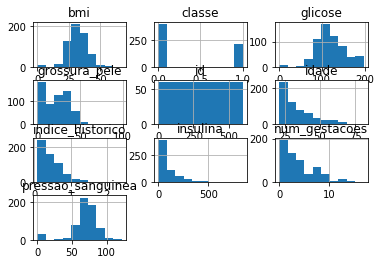

In [15]:
# Histograma Univariado
df.hist()
plt.show()

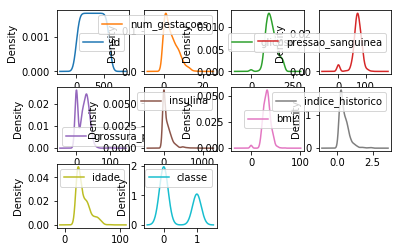

In [18]:
# Density Plot Univariado
df.plot(kind = 'density', subplots = True, layout = (3,4), sharex = False)
plt.show()

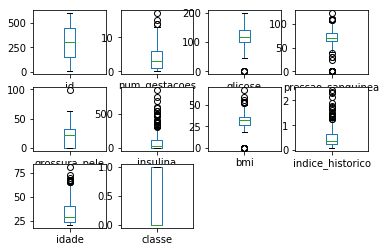

In [20]:
# Box and Whisker Plots
df.plot(kind = 'box', subplots = True, layout = (3,4), sharex = False, sharey = False)
plt.show()

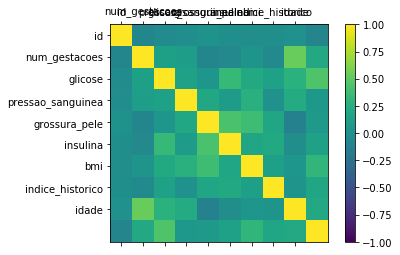

In [23]:
#Matriz de Correlação com nomes das variáveis
correlations = df.corr()
colunas = df.columns

# Plot
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, 9, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(colunas)
ax.set_yticklabels(colunas)
plt.show()

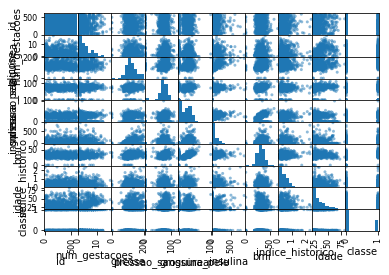

In [25]:
# Scatter Plot 
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

In [26]:
import seaborn as sns

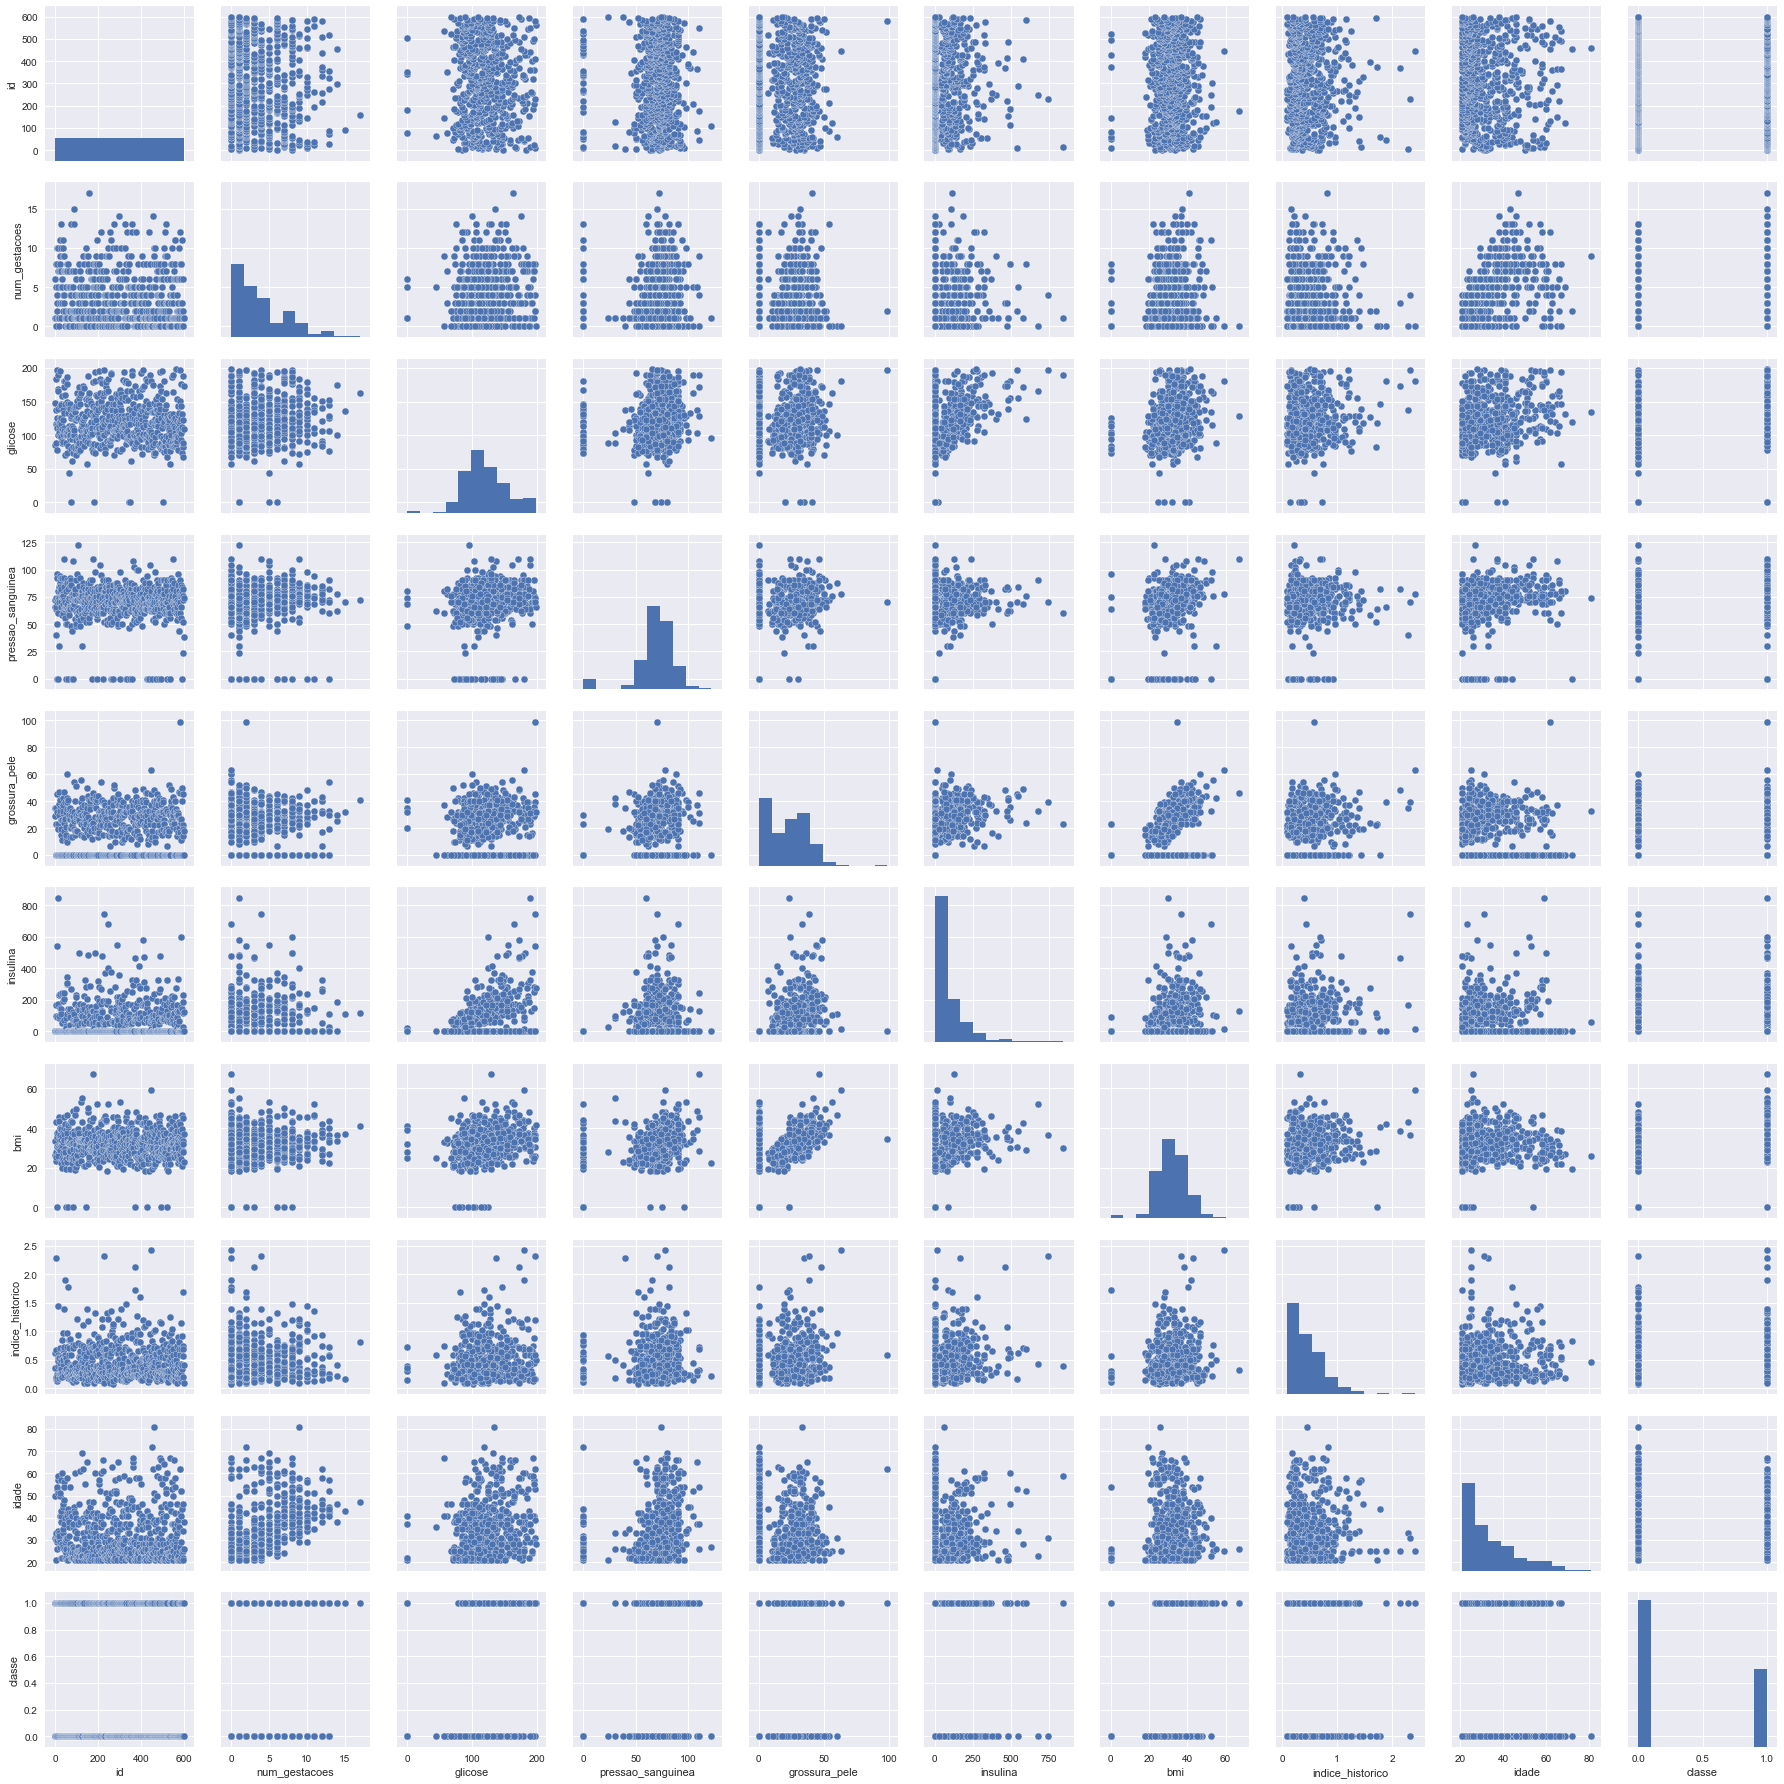

In [27]:
# Pairplot
sns.pairplot(df)

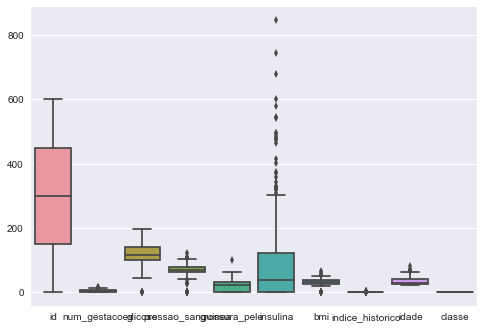

In [28]:
# Boxplot com orientação vertical
sns.boxplot(data = df, orient = "v")

In [36]:
# Transformando os dados para a mesma escala (entre 0 e 1)

# Import dos módulos
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [37]:
# Separando o array em componentes de input e output
array = df.values

X = array[:,0:8]
Y = array[:,8]

# Gerando a nova escala
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

# Sumarizando os dados transformados
print(rescaledX[0:8,:])

[[0.         0.35294118 0.74747475 0.59016393 0.35353535 0.
  0.50074516 0.23441503]
 [0.00166945 0.05882353 0.42929293 0.54098361 0.29292929 0.
  0.39642325 0.11656704]
 [0.0033389  0.47058824 0.92424242 0.52459016 0.         0.
  0.34724292 0.25362938]
 [0.00500835 0.05882353 0.44949495 0.54098361 0.23232323 0.11111111
  0.41877794 0.03800171]
 [0.0066778  0.         0.69191919 0.32786885 0.35353535 0.19858156
  0.64232489 0.94363792]
 [0.00834725 0.29411765 0.58585859 0.60655738 0.         0.
  0.38152012 0.05251921]
 [0.01001669 0.17647059 0.39393939 0.40983607 0.32323232 0.10401891
  0.46199702 0.07258753]
 [0.01168614 0.58823529 0.58080808 0.         0.         0.
  0.52608048 0.02391119]]


In [38]:
# Extração de Variáveis
test = SelectKBest(score_func = chi2, k = 4)
fit = test.fit(X, Y)

# Sumarizando o score
print(fit.scores_)
features = fit.transform(X)

# Sumarizando atributos selecionados
print(features[0:5,:])

[ 4919.72324613   843.46008293   861.46442723   445.15107705
   746.36828453 12119.52819909   132.4915323     17.49563907]
[[  1.   6. 148.   0.]
 [  2.   1.  85.   0.]
 [  3.   8. 183.   0.]
 [  4.   1.  89.  94.]
 [  5.   0. 137. 168.]]


/Users/cleversoncachoeira/anaconda/lib/python3.6/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [40]:
# Criação do modelo
modelo = LogisticRegression()

# RFE
rfe = RFE(modelo, 3)
fit = rfe.fit(X, Y)

# Print dos resultados
print("Número de Atributos: %d" % fit.n_features_)
print(df.columns[0:8])
print("Atributos Selecionados: %s" % fit.support_)
print("Ranking dos Atributos: %s" % fit.ranking_)

Número de Atributos: 3
Index(['id', 'num_gestacoes', 'glicose', 'pressao_sanguinea', 'grossura_pele',
       'insulina', 'bmi', 'indice_historico'],
      dtype='object')
Atributos Selecionados: [False  True False False  True False False  True]
Ranking dos Atributos: [6 1 5 4 1 3 2 1]


In [41]:
from sklearn.ensemble import ExtraTreesClassifier

/Users/cleversoncachoeira/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [42]:
# Criação do Modelo - Feature Selection
modelo = ExtraTreesClassifier()
modelo.fit(X, Y)

# Print dos Resultados
print(df.columns[0:8])
print(modelo.feature_importances_)

Index(['id', 'num_gestacoes', 'glicose', 'pressao_sanguinea', 'grossura_pele',
       'insulina', 'bmi', 'indice_historico'],
      dtype='object')
[0.1413336  0.12678917 0.14416237 0.1202312  0.09961153 0.09213995
 0.12892399 0.14680819]


In [43]:
from sklearn.decomposition import PCA

In [44]:
# Seleção de atributos
pca = PCA(n_components = 3)
fit = pca.fit(X)

# Sumarizando os componentes
print("Variância: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Variância: [0.66203224 0.3030296  0.02085379]
[[ 9.99969995e-01 -1.59322189e-03 -6.54035294e-03 -2.56837852e-03
   2.65038906e-03 -8.22924265e-04 -6.29160731e-04 -5.14948718e-06]
 [ 1.37220269e-03 -1.46326448e-03  1.01366665e-01  1.67469111e-02
   5.91608059e-02  9.92858373e-01  1.31211124e-02  6.34924566e-04]
 [-6.87889641e-03 -1.94154119e-02 -9.85140801e-01 -1.15792785e-01
   6.04429120e-02  9.95183375e-02 -4.59085205e-02 -7.19284752e-04]]


In [46]:
# Criação do modelo
modelo = LogisticRegression()
modelo.fit(X, Y)

# Score
result = modelo.score(X, Y)
print("Acurácia: %.3f%%" % (result * 100.0))

Acurácia: 18.000%


In [47]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

In [48]:
# Definindo os valores para os folds
num_folds = 10
num_instances = len(X)
seed = 7

# Separando os dados em folds
kfold = model_selection.KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()
resultado = model_selection.cross_val_score(modelo, X, Y, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia: %.3f%% (%.3f%%)" % (resultado.mean()*100.0, resultado.std() * 100.0))

Acurácia: 9.167% (2.500%)


In [49]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [50]:
# Definindo os valores para o número de folds
num_folds = 10
num_instances = len(X)
seed = 7

# Separando os dados em folds
kfold = model_selection.KFold(num_folds, True, random_state = seed)
cart = DecisionTreeClassifier()

# Definindo o número de trees
num_trees = 100

# Criando o modelo
modelo = BaggingClassifier(base_estimator = cart, n_estimators = num_trees, random_state = seed)
resultado = model_selection.cross_val_score(modelo, X, Y, cv = kfold)

# Print do resulatdo
print(resultado.mean())

0.07333333333333333
